<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/7_Regression_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 선형 회귀 (Linear Regression)

### 1. 선형 회귀의 원리
선형 회귀는 데이터를 기반으로 종속 변수(타겟)와 독립 변수(피처) 간의 **선형 관계**를 찾는 지도 학습 알고리즘.

- **최소 제곱법(Ordinary Least Squares)**:
  - 회귀선을 최적화하기 위해 데이터 포인트와 예측값 사이의 오차 제곱 합을 최소화 - **이상치에 민감**:
    $ \text{Loss Function} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2  $
---
### 2. 선형 회귀의 장점과 단점
| **장점**                                                                 | **단점**                                                                                                   |
|--------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| 구현이 간단하며 해석이 용이합니다.                                                        | 독립 변수와 종속 변수 간의 선형 관계가 성립하지 않을 경우 부정확한 결과를 도출할 수 있습니다.                                       |
| 계산이 빠르고 효율적이며 대규모 데이터셋에서도 사용 가능합니다.                                          | 이상치(Outlier)에 민감하며 결과가 왜곡될 수 있습니다.                                                           |
| 변수 간의 영향력을 파악할 수 있어 인사이트 도출이 가능합니다.                                             | 다중공선성(Multicollinearity)이 존재할 경우 모델이 불안정해질 수 있습니다.                                             |
| 과적합(Overfitting)이 적어 비교적 안정적인 결과를 제공합니다.                                            | 비선형 데이터나 복잡한 데이터에는 적합하지 않으며, 다항 회귀 등의 확장이 필요할 수 있습니다.                                      |

---

## 3. 평가 방법

| **평가지표**       | **공식 및 설명**                                                                                                              | **목적**                                       |
|---------------------|------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------|
| **R² (결정 계수)** | \[ R^2 = 1 - ${\sum(y_i - \hat{y}_i)^2}{\sum(y_i - \bar{y})^2}$]                   | 모델이 데이터를 얼마나 잘 설명하는지 평가.                            |
| **MAE (평균 절대 오차)** | \[ MAE = ${1}{n} \sum |y_i - \hat{y}_i| $]                                      | 예측값과 실제값의 차이를 절대값 기준으로 측정.                        |
| **MSE (평균 제곱 오차)** | \[ MSE = ${1}{n} \sum (y_i - \hat{y}_i)^2 $]                                     | 오차 제곱을 통해 큰 오차에 더 큰 패널티를 부여.                       |
| **RMSE (평균 제곱근 오차)** | \[ RMSE = ${\frac{1}{n} \sum (y_i - \hat{y}_i)^2} $]                          | MSE에 루트를 취해 오차의 실제 크기를 해석하기 용이하게 함.            |

---
### 4. 다중공선성 처리
  * 독립 변수들 간의 강한 상관관계로 인한 문제 </br>
    - 독립성을 위해하는 것으로 회귀계수의 분산이 비정상적으로 커져, 계수 추정에 불안정성 유발
    - 해결방안 : 변수 선택법, VIF 을 활용한 변수 제거
### 5. VIF
  * 선형 회귀에 변수들이 추가되는 경우, 매개변수 추정의 분산 증가에 대한 측정치 VIF > 10 일떄, 높은 상관성
    - 범주형일때에는 **더미코딩**

```python
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 예시 데이터 생성
np.random.seed(42)
X1 = np.random.rand(100)
X2 = 2 * X1 + np.random.rand(100) * 0.1  # X1과 높은 상관관계를 가진 변수
X3 = np.random.rand(100)

data = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = data.columns
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

print(vif_data)
```
### 5. VIF, PCA, 다중공선성
  - 다중공선성을 해결하는 방법
    1. VIF 변수 제거
       - 단순한 데이터인 경우, 상관관계와 VIF 분석 후, VIF 10이상 제거
       - 문제점) 반드시 VIF > 10만 문제로 간주하지 않음
    2. PCA 차원 축소
        - 변수 제거 대신 모든 변수의 정보를 최대한 유지 가능 (변수가 많거나, 상관관계가 높은 경우)
        - 문제점) 원래 변수의 의미를 잃고, 분산에 기반하기 때문에 해석이 어렵다.  
    3. 선택 기준
      3.1 해석이 중요 : VIF >> 회귀분석 </br>
      3.2 예측이 중요 : VIF >> PCA >> 회귀분석

### 잔차분석
#### 선형 회귀 검정 시 확인해야 할 4가지 조건
- 선형 회귀 모델의 적합성을 평가하기 위해 다음 네 가지 가정을 확인필요.
- 4가지를 만족하지 못하는 경우, 이상치, 영향치 처리, 다중공선성 제거, 종보 변수 스케일링 등을 진행해야함

| **가정**         | **설명**                                                                                                                                     |
|-------------------|----------------------------------------------------------------------------------------------------------------------------------------------|
| **1. 선형성 (Linearity)** | 독립 변수와 종속 변수 사이의 관계가 선형이어야 합니다.                                                                                   |
| **2. 독립성 (Independence)** | 잔차(Residuals)는 독립적이어야 하며, 서로 상관관계가 없어야 합니다.                                                                      |
| **3. 등분산성 (Homoscedasticity)** | 잔차의 분산이 일정해야 합니다. 즉, 잔차가 특정 패턴이나 경향성을 가지지 않아야 합니다.                                                         |
| **4. 정규성 (Normality)** | 잔차가 정규 분포를 따라야 합니다. (평균 0, 정규 분포를 이루는지 확인)                                                                          |

---
```python
# 1. 선형성 (예측과 잔차의 관계 산점도)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Predicted vs Residuals")
plt.show()

# 2. 독립성 (잔차가 무작위로 분포하면 독립성 가정 충족)
plt.plot(residuals, marker='o')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.title("Independence Check: Residuals vs Index")
plt.show()

#2.2 library
from statsmodels.stats.stattools import durbin_watson

# 3. 등분산성 - 독립변수와 무관하게 잔차의 분산이 일정하다
# 예측값과 잔차의 산점도 - 잔차의 분산의 일정한 정도
# 각 독립변수와 잔차의 분산이 일정한지, 표준화 잔차 값이 +/-2 넘어가면 이상값 또는 특이값을 예상
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Predicted vs Residuals")
plt.show()

# 4.정규성 확인 - 잔차가 정규분포를 가진다.
# 4.1 히스토그램
sns.histplot(residuals, kde=True)
# 4.2 QQ-plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals.flatten(), dist="norm", plot=plt)

# 4.3 library
from statsmodels.stats.stattools import jarque_bera
```

```python
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 회귀 모델 적합
X = sm.add_constant(X)  # 상수 추가
model = sm.OLS(y, X).fit()
residuals = model.resid

# 정규성 확인 (QQ plot)
sm.qqplot(residuals, line='s')
plt.show()

# 독립성 확인 (Durbin-Watson 통계) - 2 : 잔차간 독립 / 0 : 양의 상관 / 4 : 음의 상관
print("Durbin-Watson Statistic:", model.summary2().tables[1]['Durbin-Watson'])

# 등분산성 검정 (Breusch-Pagan Test)
_, pval, _, _ = het_breuschpagan(residuals, model.model.exog)
print("Breusch-Pagan p-value:", pval)

```

In [1]:
import pandas as pd
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'

data  = pd.read_csv(file_url)
df = data.copy()

In [2]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=100)

<Axes: xlabel='actual', ylabel='pred'>

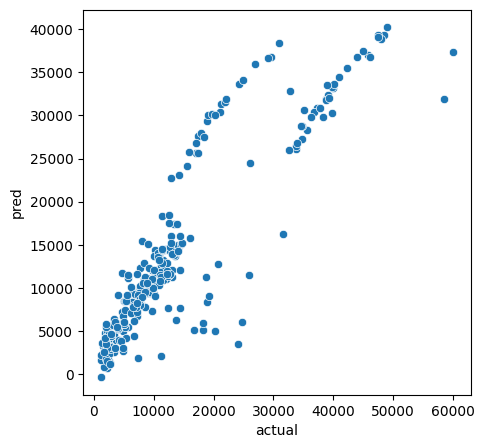

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
comparison = pd.DataFrame({'actual': y_test, 'pred': pred})

import matplotlib.pyplot as plt # ❶
import seaborn as sns # ❷

plt.figure(figsize=(5,5)) # ❶ 그래프 크기를 정의
sns.scatterplot(x = 'actual', y = 'pred', data = comparison) # ❷

In [4]:
# statmodel
import statsmodels.api as sm

XX = sm.add_constant(X)
model = sm.OLS(y, XX)
fitted = model.fit()

# 잔차추출
resid = fitted.resid
print(fitted.summary())

# 함수화- 다중 회귀
def multi_reg(X, y) :
  X_ = sm.add_constant(X)
  model = sm.OLS(X_, y)
  fitted = model.fit()
  return fitted.resid, fitted.summary()


# VIF 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

def vif_check(X, y) :
  X_ = sm.add_constant(X)
  model = sm.OLS(y, X_)
  model.fit()

  vif_df = pd.DataFrame(columns = ['Feature','VIF'])
  for i in range(1, len(model.exog_names)) :
    vif_df.loc[i, 'Feature'] = model.exog_names[i]
    vif_df.loc[i, 'VIF'] = VIF(model.exog, i)
  return vif_df.sort_values('VIF', ascending = False)

print(vif_check(X, y))

# 2.
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [VIF(X.values, i) for i in range(X.shape[1])]
vif_df


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:41:49   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.205e+04    951.260    -12.670      0.0

,Feature,VIF
0,age,7.545377
1,sex,2.000794
2,bmi,8.748157
3,children,1.799703
4,smoker,1.256793



--- 1. 선형성 테스트 ---
Linear RESET Test (p-value): 0.0000
-> 선형성이 만족되지 않습니다.


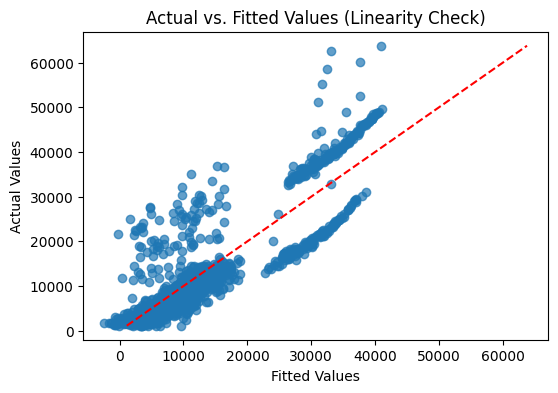


--- 2. 등분산성 테스트 ---
Breusch-Pagan Test (p-value): 0.0000
-> 등분산성이 만족되지 않습니다.


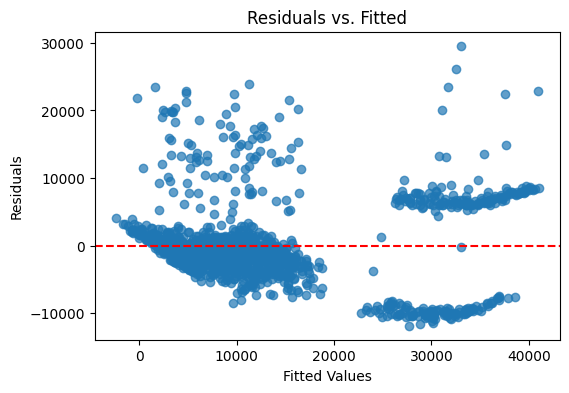


--- 3. 독립성 테스트 (Durbin-Watson) ---
Durbin-Watson Statistic: 2.0869
-> 잔차 독립성이 만족됩니다.


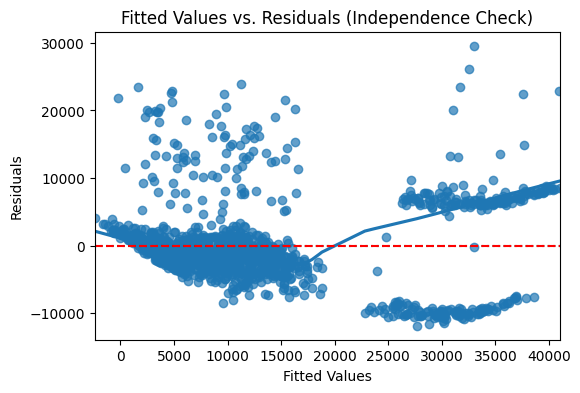


--- 4. 정규성 테스트 ---
Shapiro-Wilk Test (p-value): 0.0000
Kolmogorov-Smirnov Test (p-value): 0.0000
Jarque-Bera Test (p-value): 0.0000


<Figure size 600x400 with 0 Axes>

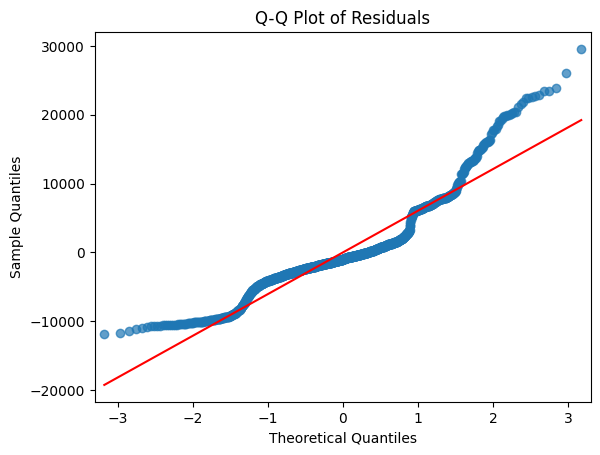

In [5]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import linear_reset
from scipy.stats import shapiro, kstest, jarque_bera

def check_reg(X, y):
    # 모델 생성
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()


    ### 1. 선형성 ### : Actual Vs Fitted Plot (실제, 예측)
    print("\n--- 1. 선형성 테스트 ---")
    linear_test = linear_reset(model)
    print(f"Linear RESET Test (p-value): {linear_test.pvalue:.4f}")
    if linear_test.pvalue > 0.05:
        print("-> 선형성이 만족됩니다.")
    else:
        print("-> 선형성이 만족되지 않습니다.")


    # 선형성 확인 그래프 (Actual vs. Fitted)
    plt.figure(figsize=(6, 4))
    plt.scatter(model.fittedvalues, y, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=1.5)  # y=x 선
    plt.xlabel('Fitted Values')
    plt.ylabel('Actual Values')
    plt.title('Actual vs. Fitted Values (Linearity Check)')
    plt.show()

    ### 2. 등분산성 ###
    print("\n--- 2. 등분산성 테스트 ---")
    _, _, _, pval = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
    print(f"Breusch-Pagan Test (p-value): {pval:.4f}")
    if pval > 0.05:
        print("-> 등분산성이 만족됩니다.")
    else:
        print("-> 등분산성이 만족되지 않습니다.")

    # Residuals vs Fitted Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()

    ### 3. 독립성 ###
    print("\n--- 3. 독립성 테스트 (Durbin-Watson) ---")
    durbin = sm.stats.durbin_watson(model.resid)
    print(f"Durbin-Watson Statistic: {durbin:.4f}")
    if 1.5 < durbin < 2.5:
        print("-> 잔차 독립성이 만족됩니다.")
    else:
        print("-> 잔차 독립성이 만족되지 않습니다.")

    # Residuals Independence Plot - Fitted Vs resid
    plt.figure(figsize=(6, 4))
    sns.residplot(x=model.predict(X), y=model.resid, lowess=True, scatter_kws={'alpha': 0.7})
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Fitted Values vs. Residuals (Independence Check)')
    plt.show()

    ### 4. 정규성 ###
    print("\n--- 4. 정규성 테스트 ---")
    # Shapiro-Wilk Test
    stat, p_val = shapiro(model.resid)
    print(f"Shapiro-Wilk Test (p-value): {p_val:.4f}")
    # K-S Test
    stat, p_val = kstest((model.resid - model.resid.mean()) / model.resid.std(), 'norm')
    print(f"Kolmogorov-Smirnov Test (p-value): {p_val:.4f}")
    # Jarque-Bera Test
    stat, p_val = jarque_bera(model.resid)
    print(f"Jarque-Bera Test (p-value): {p_val:.4f}")

    # Q-Q Plot
    plt.figure(figsize=(6, 4))
    sm.qqplot(model.resid, line='s', alpha=0.7)
    plt.title('Q-Q Plot of Residuals')
    plt.show()

# Example Usage:
check_reg(X, y)


### **1. 영향치(Influence)란?**
- 회귀 분석에서 특정 데이터 포인트(관측값)가 **회귀 모델의 결과(계수, 예측값 등)에 미치는 영향**을 측정하는 지표.
- 영향치가 높은 데이터는 **이상치(Outliers)** 또는 **지렛대점(Leverage Points)**일 가능성이 있으며, 모델의 안정성과 정확성을 저하시킬 수 있음.

### 1.1 중요한 이유
- 모델 안전성 : 영향치가 높은 데이터는 계수 추정과 예측값에 영향
- 오류 탐지 : 영향치가 높은 데이터는 입력오류, 측정 오류, 도메인과 관련 없는 이상치 일 수 있음


# **영향치가 높고 낮을 때의 예**

| **상황**               | **정의**                                 | **영향치 높음**                                  |
|------------------------|-----------------------------------------------|-----------------------------------------------|
| **Leverage**           | 데이터가 예측값에 얼마나 기여하는지를 측정                    | 독립변수가 평균에서 멀리 떨어져 있음             |
|
| **Cook's Distance**    | 레버리지와 잔차의 크기를 합쳐 영향력 판단       | 데이터가 회귀 계수에 큰 영향을 미침              |
|
| **Studentized Residuals** | 잔차를 표준화한 값으로, 데이터가 모델의 잔차 분석에 미치는 영향을 측정                    | 잔차가 크며, 종속변수 값이 비정상적              |
|
| **DFBETAS/DFFITS**     | 특정 관측치 제외시 종속변수 예측치의 변화정도 측정    | 특정 회귀 계수나 예측값에 큰 영향을 미침         |


---

Identified Outliers:


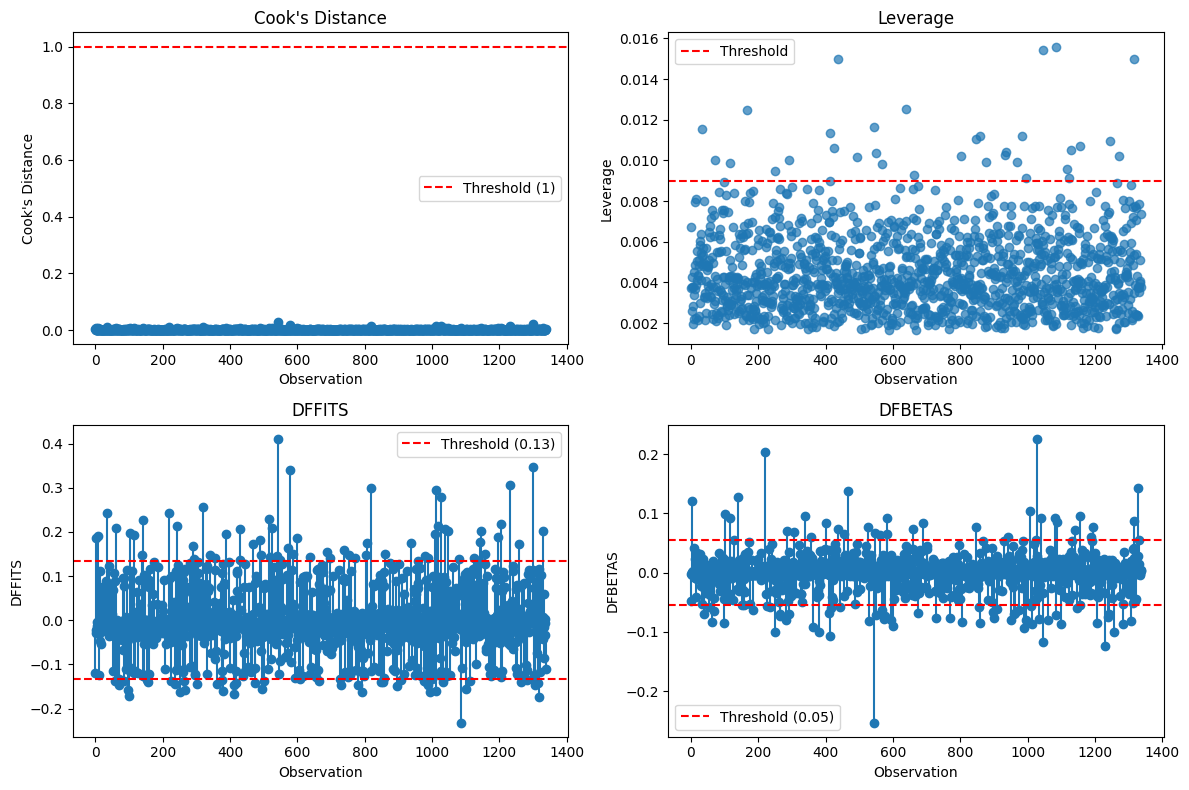


    1. Cook`s Distance Plot : 데이터가 0 근처에 몰려있으며 1 이상인 점이 없다. 즉, 극단적인 영향치를 가지는 데이터가 없으며, 모델의 안정성이 높다.
    2. Leverage Plot : 대부분 임계값 (0.13)이내에 있으며, 몇몇 데이터가 기준선을 초과하지만 전반적으로 안정적이다. 하지만, 일부 데이터는 검토가 필요해보인다.
    3. DFFITS : 대부분 임계값안에 존재하며, 극단적인 이상점은 보이지 않는다. 일부가 DFFITS 기준을 넘지만, 모델 왜곡을 유발해보이지 않음
    4. DFBETAS : 대부분이 임계값 0.05 안에 있으나, 일부 데이터가 특정 회귀계수에 영향을 미칠 수 있다.




In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def analyze_influence(X, y):
    """
    계산된 영향치를 사용해 이상점을 탐지하고 시각화하는 함수.
    """
    # 상수 추가
    X = sm.add_constant(X)
    fitted = sm.OLS(y, X).fit()

    # 영향치 계산
    cook = fitted.get_influence().cooks_distance[0]
    dfb = fitted.get_influence().dfbetas[:, 0]
    dff = fitted.get_influence().dffits_internal[0]
    lev = fitted.get_influence().hat_matrix_diag
    influ_df = pd.DataFrame({
        "cooks_distance": cook,
        "dfbetas": dfb,
        "dffits": dff,
        "leverageH": lev
    })

    # 데이터 크기
    n = len(X)  # 데이터 개수
    p = X.shape[1]  # 변수 개수 (상수 포함)

    # 임계값 정의
    cooks_threshold = 1
    dfbetas_threshold = 2 / np.sqrt(n)
    dffits_threshold = 2 * np.sqrt(p / n)
    leverage_threshold = 2 * p / n

    # 이상점 판단
    influ_df['cooks_outlier'] = influ_df['cooks_distance'] > cooks_threshold
    influ_df['dfbetas_outlier'] = abs(influ_df['dfbetas']) > dfbetas_threshold
    influ_df['dffits_outlier'] = abs(influ_df['dffits']) > dffits_threshold
    influ_df['leverage_outlier'] = influ_df['leverageH'] > leverage_threshold
    influ_df['is_outlier'] = influ_df[['cooks_outlier', 'dfbetas_outlier', 'dffits_outlier', 'leverage_outlier']].any(axis=1)

    # 이상점 출력
    print("Identified Outliers:")
    #print(influ_df[influ_df['is_outlier']])

    # 시각화
    plt.figure(figsize=(12, 8))

    # Cook's Distance Plot
    plt.subplot(2, 2, 1)
    plt.stem(range(len(influ_df['cooks_distance'])), influ_df['cooks_distance'], markerfmt="o", basefmt=" ")
    plt.axhline(y=cooks_threshold, color='red', linestyle='--', label='Threshold (1)')
    plt.xlabel('Observation')
    plt.ylabel("Cook's Distance")
    plt.title("Cook's Distance")
    plt.legend()

    # Leverage Plot
    plt.subplot(2, 2, 2)
    plt.scatter(range(len(influ_df['leverageH'])), influ_df['leverageH'], alpha=0.7)
    plt.axhline(y=leverage_threshold, color='red', linestyle='--', label='Threshold')
    plt.xlabel('Observation')
    plt.ylabel('Leverage')
    plt.title('Leverage')
    plt.legend()

    # DFFITS Plot
    plt.subplot(2, 2, 3)
    plt.stem(range(len(influ_df['dffits'])), influ_df['dffits'], markerfmt="o", basefmt=" ")
    plt.axhline(y=dffits_threshold, color='red', linestyle='--', label=f'Threshold ({dffits_threshold:.2f})')
    plt.axhline(y=-dffits_threshold, color='red', linestyle='--')
    plt.xlabel('Observation')
    plt.ylabel('DFFITS')
    plt.title('DFFITS')
    plt.legend()

    # DFBetas Plot
    plt.subplot(2, 2, 4)
    plt.stem(range(len(influ_df['dfbetas'])), influ_df['dfbetas'], markerfmt="o", basefmt=" ")
    plt.axhline(y=dfbetas_threshold, color='red', linestyle='--', label=f'Threshold ({dfbetas_threshold:.2f})')
    plt.axhline(y=-dfbetas_threshold, color='red', linestyle='--')
    plt.xlabel('Observation')
    plt.ylabel('DFBETAS')
    plt.title('DFBETAS')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return influ_df

analyze_influence(X,y)
print("""
    1. Cook`s Distance Plot : 데이터가 0 근처에 몰려있으며 1 이상인 점이 없다. 즉, 극단적인 영향치를 가지는 데이터가 없으며, 모델의 안정성이 높다.
    2. Leverage Plot : 대부분 임계값 (0.13)이내에 있으며, 몇몇 데이터가 기준선을 초과하지만 전반적으로 안정적이다. 하지만, 일부 데이터는 검토가 필요해보인다.
    3. DFFITS : 대부분 임계값안에 존재하며, 극단적인 이상점은 보이지 않는다. 일부가 DFFITS 기준을 넘지만, 모델 왜곡을 유발해보이지 않음
    4. DFBETAS : 대부분이 임계값 0.05 안에 있으나, 일부 데이터가 특정 회귀계수에 영향을 미칠 수 있다.

""")

#### Step_Wise

In [7]:
import statsmodels.api as sm

def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out=0.05,
                       verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # Backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)


Add  smoker                         with p-value 8.27144e-283
Add  age                            with p-value 2.90975e-92
Add  bmi                            with p-value 2.41856e-30
Add  children                       with p-value 0.000607716


In [8]:
## 완벽 머신러닝 예제
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')

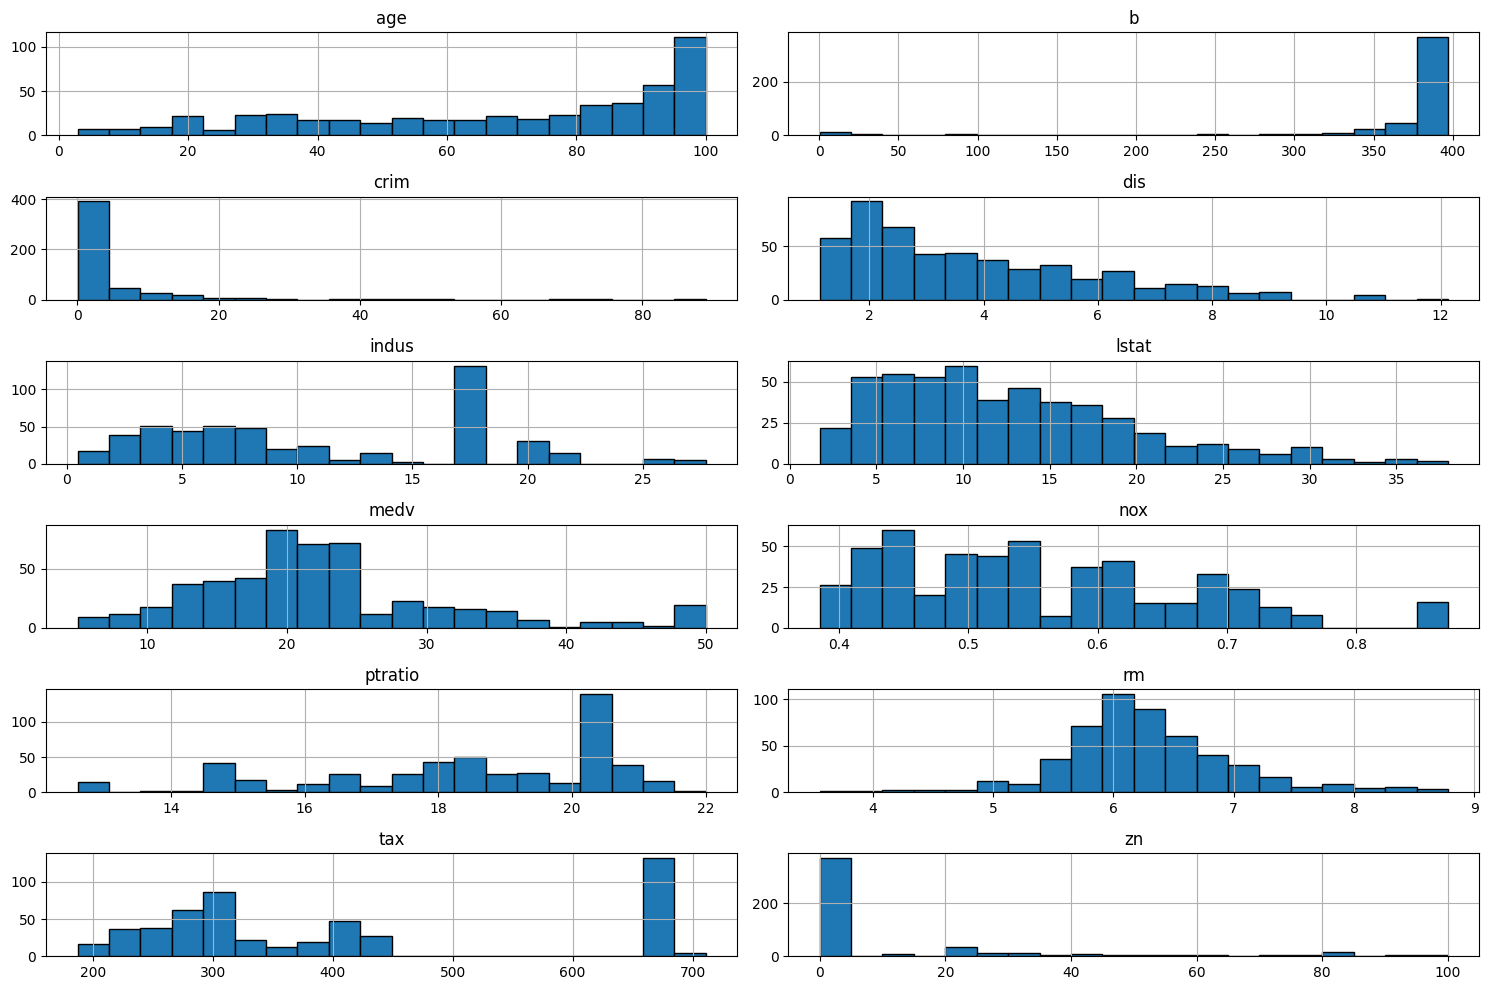

In [9]:
selected_cols = df.columns.difference(['chas','rad'])

fig, axes = plt.subplots(6,2, figsize =  (15, 10))

for i, ax in enumerate(axes.flat[:len(selected_cols)]) :
  col_i = selected_cols[i]
  df[col_i].hist(ax = ax, bins = 20, edgecolor = 'black')
  ax.set_title(col_i)
fig.tight_layout()
plt.show()

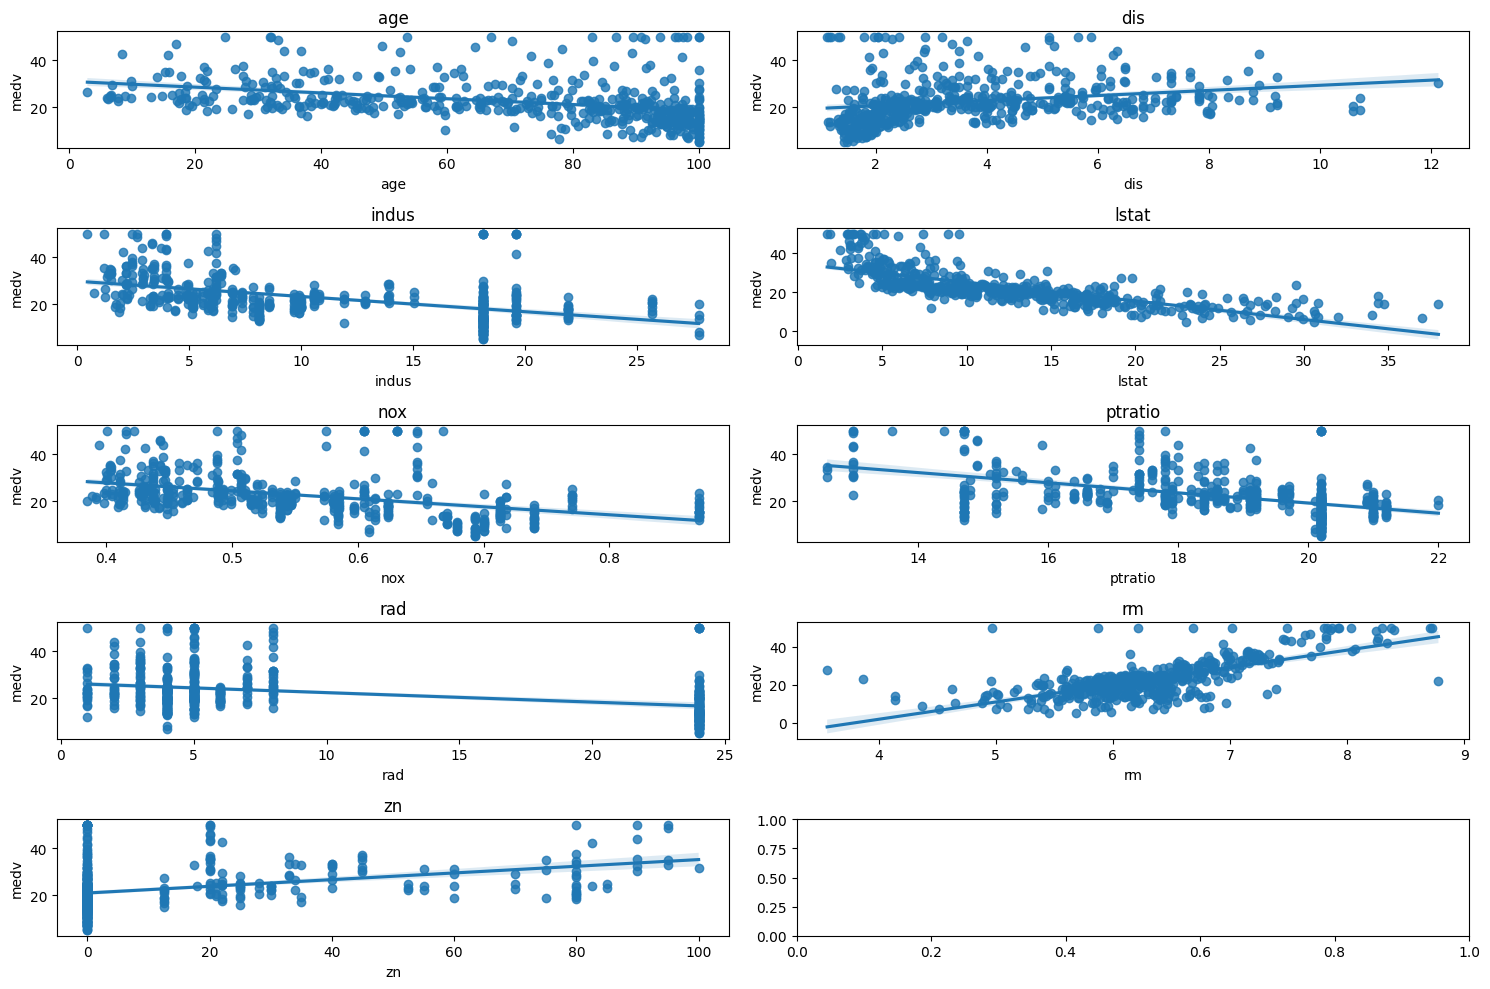

In [10]:
selected_col2 = df.columns.difference(['crim','crim','tax','chas','b','medv'])


fig, axes = plt.subplots(5,2, figsize =  (15, 10))

for i, ax in enumerate(axes.flat[:len(selected_col2)]) :
  col_i = selected_col2[i]
  sns.regplot(x = col_i, y = 'medv', data = df, ax = ax)
  ax.set_title(col_i)

for j in range(len(selected_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **선형 회귀 모델 비교**

| **모델** | **특징** | **장점** | **단점** | **적합한 데이터** |
|----------|----------|----------|----------|----------------|
| **일반 선형 회귀 (Linear Regression)** | 독립 변수와 종속 변수 간의 **선형 관계**를 가정 | - 해석 용이<br>- 빠른 계산 속도 | - 다중공선성 문제<br>- 과적합 위험 | 독립 변수 간 **다중공선성이 낮고**, 데이터가 **선형 관계**를 가질 때 |
| **릿지 회귀 (Ridge Regression)** | **L2 정규화**를 사용하여 회귀 계수의 크기를 제한 | - 다중공선성 완화<br>- 과적합 방지 | - 모든 계수가 0이 되지 않음 → 변수 선택 불가 | 다중공선성이 높고, 모든 변수를 고려해야 할 때 |
| **라쏘 회귀 (Lasso Regression)** | **L1 정규화**를 사용하여 일부 회귀 계수를 0으로 만듦 (변수 선택 기능) | - 변수 선택 가능<br>- 과적합 방지 | - 다중공선성 해결 능력이 릿지보다 낮음 | 변수 선택이 필요한 경우, 불필요한 변수가 많을 때 |
| **엘라스틱 넷 (Elastic Net)** | L1 + L2 정규화를 결합하여 릿지와 라쏘의 장점 활용 | - 변수 선택 가능<br>- 다중공선성 완화 | - 하이퍼파라미터 조정 필요 | 다중공선성이 높고, 일부 변수 제거가 필요한 경우 |
|

In [11]:
from sklearn.model_selection import train_test_split , cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score,  mean_squared_error
from sklearn.preprocessing import StandardScaler


r_df = df.copy()

X = r_df.drop(columns = ['medv'], axis =1)
y = r_df['medv']

# 1) Scaler 적용을 통해 데이터의 왜곡을 방지
s_X = pd.DataFrame(StandardScaler().fit_transform(X) , columns = X.columns)

# 2) Set 구분
X_train, X_test, y_train, y_test = train_test_split(s_X, y, test_size = 0.2, random_state= 1234)

# 3) Models

models = {"linear_Regression" : LinearRegression(),
          "Ridge" : Ridge(),
          "Lasso" : Lasso()}

res = []
for name, model in models.items() :
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  res.append([name,rmse])

pd.DataFrame(res, columns = ['Model_name', 'RMSE'])

,Model_name,RMSE
0,linear_Regression,4.895362
1,Ridge,4.884327
2,Lasso,5.455150


In [12]:
## 가장 성능이 좋은 알고리즘으로 K-FOLD 교차 검증 수행

rigde = Ridge()

scores = cross_val_score(rigde, s_X, y, scoring = 'neg_mean_squared_error', cv = 5)
rmse_score = np.sqrt(-1 * scores)


for fold, rmse in enumerate(rmse_score, 1) :
  print(f"Fold {fold} : {rmse}")

print(np.mean(rmse_score))
print("""
Fold 1에서는 RSME 가 3.5로 상대적으로 작은 오차를 보이지만, Fold 4에서 다소 큰 오차가 생긴것으로 보아
데이터 분할에 따라 성능 변동이 심하고, 과소적합 혹은 과적합이 되었을 가능성이 있다.
""")

Fold 1 : 3.509651750012155
Fold 2 : 5.077228664316056
Fold 3 : 5.74320997256618
Fold 4 : 8.972568172599738
Fold 5 : 5.711789026794539
5.802889517257733

Fold 1에서는 RSME 가 3.5로 상대적으로 작은 오차를 보이지만, Fold 4에서 다소 큰 오차가 생긴것으로 보아
데이터 분할에 따라 성능 변동이 심하고, 과소적합 혹은 과적합이 되었을 가능성이 있다.



In [13]:
## 모델 및 파라미터 후보 설정 - 전체 모델들 K-Fold 교차 검증까지 완료
import warnings
warnings.filterwarnings('ignore')
models = {
    "Linear Regression" : LinearRegression() ,
    "Ridge" : [Ridge(alpha = a) for a in [0.01, 0.1, 1, 0, 10, 100]] ,
    "Lasso" : [Lasso(alpha = a) for a in [0.01, 0.1, 1, 0., 10, 100]]

}

k = KFold(n_splits=5, shuffle = True, random_state = 42)

best_model = None
best_score = float("inf")
best_params = {}

res = []

for name, model_list in models.items() :
  if isinstance(model_list, list) :
    for model in model_list :
      scores = cross_val_score(model, s_X, y, scoring = 'neg_mean_squared_error', cv = k)
      rmse_score = np.sqrt(-1 * scores)
      average_rmse = np.mean(rmse_score)

      res.append({
          "Model" : name,
          "Alpha" : model,
          "Mean RMSE" : average_rmse
      })

  else :
      scores = cross_val_score(model_list, s_X, y, scoring = 'neg_mean_squared_error', cv = k)
      rmse_score = np.sqrt(-1 * scores)
      average_rmse = np.mean(rmse_score)

      res.append({
          "Model" : name,
          "Alpha" : None,
          "Mean RMSE" : average_rmse
      })

      if average_rmse < best_score :
        best_score = average_rmse
        best_model = model_list
        best_params = {}

pd.DataFrame(res)

,Model,Alpha,Mean RMSE
0,Linear Regression,None,4.842789
1,Ridge,Ridge(alpha=0.01),4.842787
2,Ridge,Ridge(alpha=0.1),4.842766
3,Ridge,Ridge(alpha=1),4.842692
4,Ridge,Ridge(alpha=0),4.842789
5,Ridge,Ridge(alpha=10),4.849749
6,Ridge,Ridge(alpha=100),5.022694
7,Lasso,Lasso(alpha=0.01),4.841789
8,Lasso,Lasso(alpha=0.1),4.895869
9,Lasso,Lasso(alpha=1),5.408892


#### Robust Regression : 이상치에 강한 선형 회귀
- 잔차의 제곱 대신 **절대값의 합이 최소가 되도록** 계수를 추정하여 이상치에 덜 민감한 회귀 모델을 구현

##### 1. 주요 특징
      1. 최소제곱법은 이상치가 많아질 수록 회귀선의 왜곡이 심해지지만, Robust는 이상치를 고려하여 회귀계수를 조정
      2. 이상치로 의심되는 데이터의 가중치를 줄여, 영향력을 최소화
      3. 데이터에 이상치가 많은 경우, Huber Regression이나 RANSAC Regression을 활용하지만, 계산량이 많다.

#### 2. 장/단점
      1. 장점 : 이상치에 강함/ 적은 데이터의 왜곡/비정규 분포에서 성능이 좋음
      2. 단점 : 계산비용증가/ 모델 해석이 어려움/ 최적의 손실함수 선택이 필요


```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor

# 랜덤 데이터 생성 (이상치 포함)
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2.5 * X.flatten() + np.random.normal(0, 1, 50)

# 일부 데이터에 이상치 추가
y[10:15] += 15  
y[35:40] -= 10  

# 모델 생성
ols = LinearRegression()
huber = HuberRegressor()
ransac = RANSACRegressor()

# 모델 학습
ols.fit(X, y)
huber.fit(X, y)
ransac.fit(X, y)

# 예측값
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_ols = ols.predict(X_pred)
y_huber = huber.predict(X_pred)
y_ransac = ransac.predict(X_pred)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label="Data (with outliers)")
plt.plot(X_pred, y_ols, label="OLS Regression", linestyle="dashed", color="red")
plt.plot(X_pred, y_huber, label="Huber Regression", linestyle="solid", color="blue")
plt.plot(X_pred, y_ransac, label="RANSAC Regression", linestyle="dotted", color="green")

plt.legend()
plt.title("Comparison of Robust Regression Methods")
plt.xlabel("X")
plt.ylabel("y")
plt.show()



#### Qauntile Regression
- 분위 회귀는 중위수, 특정 분위 (Quantile)의 값을 예측
- 분산이 일정하지 않은 이분산데이터에 적용  

##### 1. 주요 특징
      1. 특정 분위수 예측 : 분위수의 값이 어떻게 변하는지 분석
      2. 이상치에 강함 : 이상치 영향을 최소화함
      3. 데이터의 분포의 전반적인 형태 분석 가능 : 여러 개의 분위수를 활용하여 데이터의 전체적인 패턴을 분석

##### 2. 장/단점
      1. 장점 : 특정 분위수 예측/이상치 영향 덜 받음/비정규분포에서 활용
      2. 단점 : 계산량이 많음/해석이 어려움/다중공선성 문제
```python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, QuantileRegressor
from statsmodels.regression.quantile_regression import QuantReg

# 랜덤 데이터 생성
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2.5 * X.flatten() + np.random.normal(0, 1, 50)

# 일부 데이터에 이상치 추가
y[10:15] += 10  
y[35:40] -= 10  

# OLS 회귀
ols = LinearRegression()
ols.fit(X, y)
y_ols = ols.predict(X)

# 분위수 회귀 (τ = 0.25, 0.5, 0.75)
quantiles = [0.25, 0.5, 0.75]
quantile_models = {q: QuantReg(y, np.column_stack((np.ones(len(X)), X))).fit(q=q) for q in quantiles}

# 예측값 계산
X_pred = np.linspace(0, 10, 100).reshape(-1, 1)
y_quantiles = {q: quantile_models[q].predict(np.column_stack((np.ones(len(X_pred)), X_pred))) for q in quantiles}

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", label="Data (with outliers)")
plt.plot(X_pred, y_ols, label="OLS Regression", linestyle="dashed", color="red")
for q, y_q in y_quantiles.items():
    plt.plot(X_pred, y_q, label=f"Quantile Regression (τ={q})")

plt.legend()
plt.title("Comparison of Quantile Regression and OLS")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


Quantile coefficients [94.2083527], score -0.820
Linear coefficients [-10.91352281], score 0.009


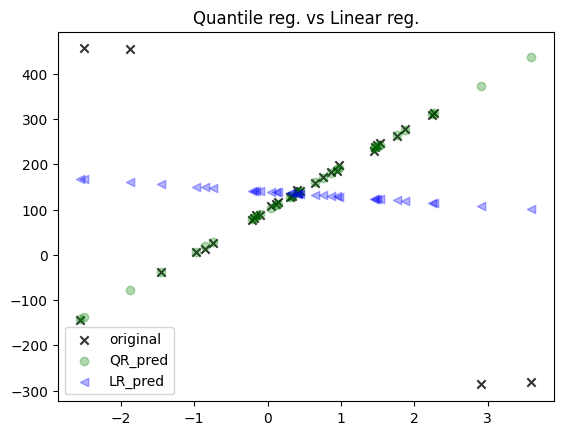


1.선형 회귀(LR, 파란색 삼각형)의 한계

선형 회귀는 이상치(outliers)의 영향을 받아 예측값이 한쪽으로 쏠릴 가능성이 있음
데이터가 좌우로 퍼져 있는 경우에도 단일한 직선으로 표현되기 때문에, 극단적인 데이터 패턴을 반영하기 어려움

2.분위 회귀(QR, 연두색 원)의 강점
이상치(검은 X)가 있는 데이터에서도 전체적인 패턴을 고려하여 예측 수행
특정 분위수(예: 중위수)에 맞추어 보다 강건한(trend-following) 회귀선을 형성
따라서 데이터 분포의 중심뿐만 아니라, 하위 및 상위 분위도 효과적으로 모델링 가능

3. 이상치(Outliers) 처리 차이
선형 회귀(LR_pred, 파란 삼각형)는 이상치의 영향을 받아 중앙으로 밀집된 예측값을 보임
반면 분위 회귀(QR_pred, 연두색 원)는 데이터의 전체적인 분위 패턴을 유지하면서 이상치 영향을 줄이고 있음



In [18]:
from sklearn.linear_model import QuantileRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import HuberRegressor
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

# 1개의 feature를 가진 사이즈 30의 데이터 생성
X, y =  make_regression(n_samples=30, n_features=1, random_state=0, noise=4.0, bias=100.0)

# 4개의 outlier를 생성하여 데이터에 추가
rng = np.random.RandomState(0)

X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)
X_outliers[:2, :] += X.max() + X.mean() #outlier의 반은 더 크게
X_outliers[2:, :] += X.min() - X.mean() #outlier의 반은 더 작게
y_outliers[:2] += y.min() - y.mean()
y_outliers[2:] += y.max() + y.mean()
X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

# QuantileRegressor 적합
QR = QuantileRegressor(alpha=0).fit(X, y)
QR_pred = QR.predict(X)
print("Quantile coefficients {}, score {:.3f}".format(QR.coef_, QR.score(X, y)))

# 선형회귀 적합
LR = LinearRegression().fit(X, y)
LR_pred = LR.predict(X)
print("Linear coefficients {}, score {:.3f}".format(LR.coef_, LR.score(X, y)))

fig, ax = plt.subplots(1,1)
ax.set_title("Quantile reg. vs Linear reg.")
ax.scatter(X, y, color = 'black', alpha=0.8, marker='x')
ax.scatter(X, QR_pred, color='green', alpha=0.3, marker='o')
ax.scatter(X, LR_pred, color='blue', alpha=0.3, marker='<')
plt.legend(['original', 'QR_pred', 'LR_pred'])
plt.show()

print("""
1.선형 회귀(LR, 파란색 삼각형)의 한계

선형 회귀는 이상치(outliers)의 영향을 받아 예측값이 한쪽으로 쏠릴 가능성이 있음
데이터가 좌우로 퍼져 있는 경우에도 단일한 직선으로 표현되기 때문에, 극단적인 데이터 패턴을 반영하기 어려움

2.분위 회귀(QR, 연두색 원)의 강점
이상치(검은 X)가 있는 데이터에서도 전체적인 패턴을 고려하여 예측 수행
특정 분위수(예: 중위수)에 맞추어 보다 강건한(trend-following) 회귀선을 형성
따라서 데이터 분포의 중심뿐만 아니라, 하위 및 상위 분위도 효과적으로 모델링 가능

3. 이상치(Outliers) 처리 차이
선형 회귀(LR_pred, 파란 삼각형)는 이상치의 영향을 받아 중앙으로 밀집된 예측값을 보임
반면 분위 회귀(QR_pred, 연두색 원)는 데이터의 전체적인 분위 패턴을 유지하면서 이상치 영향을 줄이고 있음
""")

#### 핵심만 요약한 연습 세트

In [19]:
from pandas import read_csv, concat, get_dummies
realestate = read_csv('https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/practice8_BHP2.csv')
df = realestate.copy()
print(realestate)

     area_type  availability  size  total_sqft  bath  balcony   price
0        Super             0     3      1056.0     2        1   39.07
1         Plot             1     6      2600.0     5        3  120.00
2        Super             1     5      1521.0     3        1   95.00
3        Super             1     3      1170.0     2        1   38.00
4         Plot             1     6      2785.0     5        3  295.00
...        ...           ...   ...         ...   ...      ...     ...
7490     Super             1     5      1345.0     2        1   57.00
7491     Super             1     5      1715.0     3        3  112.00
7492  Built-up             1     8      3453.0     4        0  231.00
7493  Built-up             1     3      1141.0     2        1   60.00
7494     Super             0     7      4689.0     4        1  488.00

[7495 rows x 7 columns]


In [20]:
# 1) 선형 회귀 분석을 수행하시오 y = price

# area_type을 dummies 화
X = pd.get_dummies(df.drop(columns = ['price'], axis = 1), columns = ['area_type'], dtype = 'int', drop_first= True)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)


import statsmodels.api as sm
from sklearn.metrics import r2_score

X_ = sm.add_constant(X)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

pred = model.predict(X_test)
print(r2_score(y_test, pred))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.712
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              1733.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                        0.00
Time:                        11:43:42   Log-Likelihood:                         -32395.
No. Observations:                5621   AIC:                                  6.481e+04
Df Residuals:                    5613   BIC:                                  6.486e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [21]:
# 2번 : 앞선 모델에서 변수 area_type과 total_sqft의 교호작용항을 축하여 회귀분석을 수행

X_train2 , X_test2 = X_train.copy() , X_test.copy()

for col in ['area_type_Carpet' , 'area_type_Plot', 'area_type_Super'] :
  X_train2[f"{col[10:]}_total_sqft"] = X_train[col] * X_train['total_sqft']
  X_test2[f"{col[10:]}_total_sqft"] = X_test2[col] * X_test2['total_sqft']

model2 = sm.OLS(y_train, X_train2).fit()
print(model2.summary())

pred2 = model2.predict(X_test2)
print(r2_score(y_test, pred2))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.740
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              1454.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                        0.00
Time:                        11:43:42   Log-Likelihood:                         -32102.
No. Observations:                5621   AIC:                                  6.423e+04
Df Residuals:                    5610   BIC:                                  6.430e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [22]:
# total_sqft의 이차항을 추가한 X_train3, X_test3 생성
X_train3, X_test3 = X_train2.copy(), X_test2.copy()
X_train3["total_sqft2"] = X_train2['total_sqft']**2
X_test3["total_sqft2"] = X_test2['total_sqft']**2

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model3 = sm.OLS(y_train, X_train3)
fitted3 = model3.fit()
print(fitted3.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred3 = fitted3.predict(X_test3)
print(">>> test score {:.3f}".format(r2_score(y_test, pred3)))

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              1934.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):                        0.00
Time:                        11:43:42   Log-Likelihood:                         -31292.
No. Observations:                5621   AIC:                                  6.261e+04
Df Residuals:                    5609   BIC:                                  6.269e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [23]:
# 3. 앞선 모델에서 변수 선택 과정을 거쳐 최종 모델을 완성하고 결과를 해석하시오.
print("""Cook's distance, DFBETAS, DFFITS, LeverageH 등 영향치 기준으로 데이터를 판단하여 영향치를 제거하거나,
 VIF를 통해 다중공선성이 있는 변수를 제거하거나, AIC를 최소로하는 변수의 조합을 찾는 단계적 선택법으로 변수를 선택할 수 있다
 여기에서는 통계적으로 유의하지 않은 변수들을 제거함으로써 최종 변수를 선택하고자 한다.""")

X_train4, X_test4 = X_train3.copy(), X_test3.copy()
# 회귀계수 분석을 위해 feature scaling 진행
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train4)
X_train3 = pd.DataFrame(ss.transform(X_train4), columns=X_train4.columns)
X_test4 = pd.DataFrame(ss.transform(X_test4), columns=X_test4.columns)
X_train4['const'] = 1
X_test4['const'] = 1

# 통계적으로 유의하지 않은 변수들 제거
del_feats = ['bath', 'Plot_total_sqft', 'availability']
X_train4 = X_train4.drop(del_feats, axis=1)
X_test4 = X_test4.drop(del_feats, axis=1)

# 신규 feature를 생성한 데이터로 선형회귀 분석을 수행
model4 = sm.OLS(y_train.values, X_train4)
fitted4 = model4.fit()
print(fitted4.summary()) # 적합한 선형회귀 모델 결과를 확인

# 적합한 모델로 test set을 예측하여 결정계수를 확인
pred4 = fitted4.predict(X_test4)
print(">>> test score {:.3f}".format(r2_score(y_test, pred4)))

Cook's distance, DFBETAS, DFFITS, LeverageH 등 영향치 기준으로 데이터를 판단하여 영향치를 제거하거나,
 VIF를 통해 다중공선성이 있는 변수를 제거하거나, AIC를 최소로하는 변수의 조합을 찾는 단계적 선택법으로 변수를 선택할 수 있다
 여기에서는 통계적으로 유의하지 않은 변수들을 제거함으로써 최종 변수를 선택하고자 한다.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1128.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):               0.00
Time:                        11:43:43   Log-Likelihood:                -31259.
No. Observations:                5621   AIC:                         6.254e+04
Df Residuals:                    5611   BIC:                         6.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
        

#### 완벽머신러닝 예제

In [56]:
bike = pd.read_csv('https://raw.githubusercontent.com/sinhabishal77/Kaggle-Bike-Sharing-Demand/refs/heads/main/train.csv')

df = bike.copy()
df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour


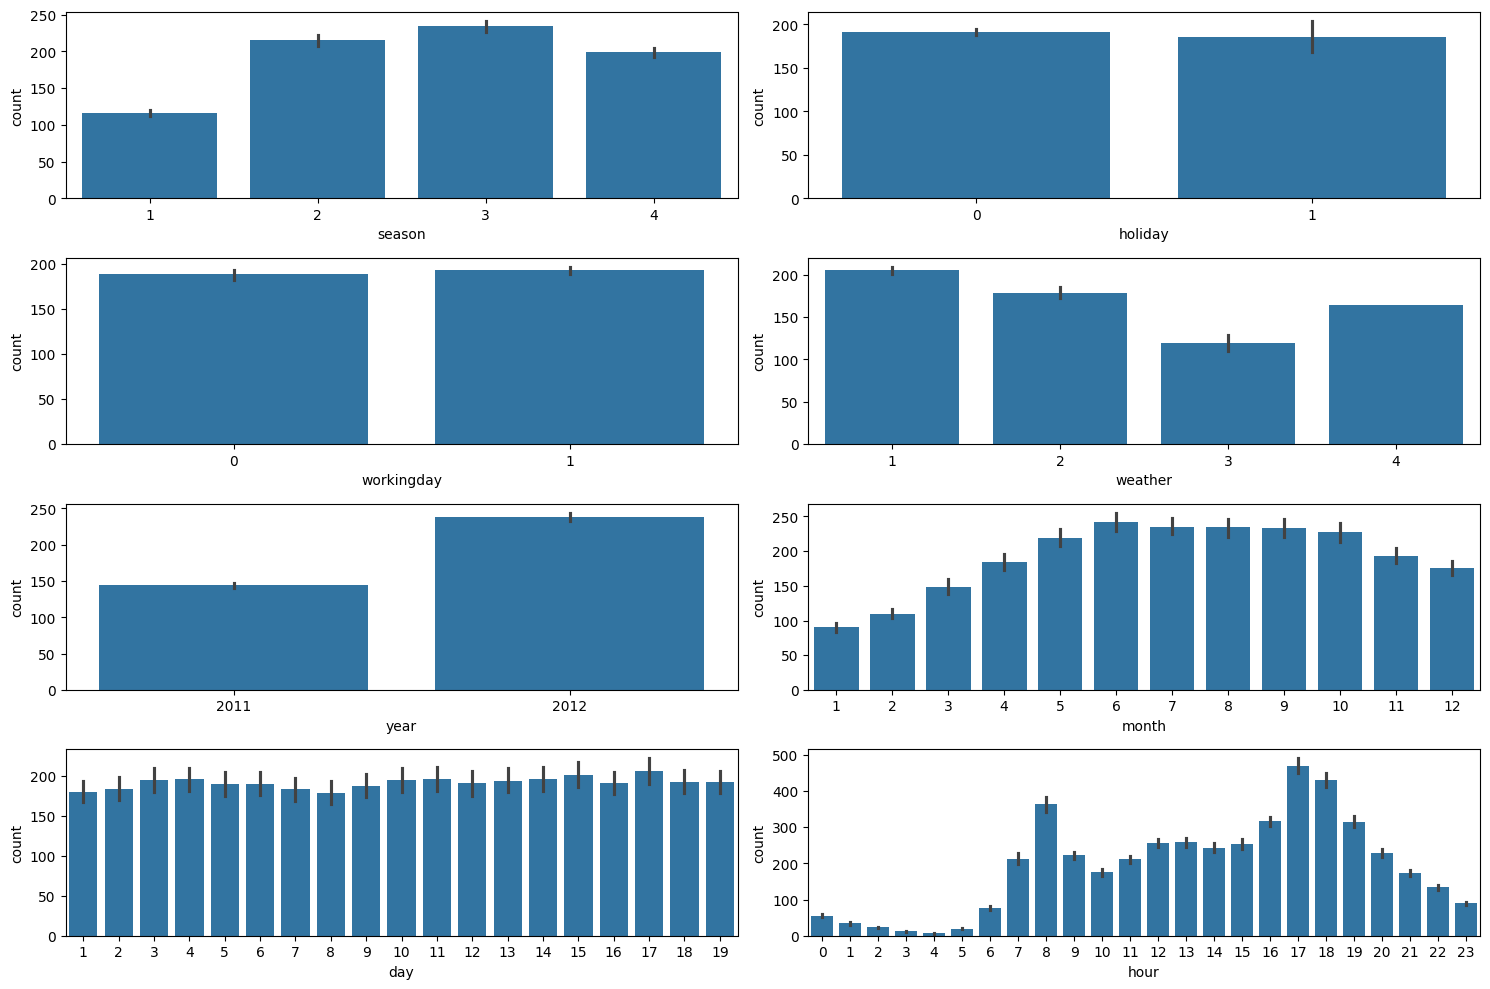

In [57]:
# Visualization - 각 컬럼별 Count 의 분포
cols = [ 'season', 'holiday', 'workingday', 'weather',  'year', 'month', 'day', 'hour']

fig, axes = plt.subplots(4, 2, figsize = (15,10))
for i , feature in enumerate(cols) :
  row = int(i//2)
  col = i % 2
  sns.barplot(x = feature, y = 'count', data = df, ax = axes[row][col])

plt.tight_layout()

260.1013182421712
        Actual  pred      diff
1478  0.693147   1.0 -0.306853
68    0.693147   1.0 -0.306853
2043  0.693147   1.0 -0.306853
231   0.693147   1.0 -0.306853
607   0.693147   1.0 -0.306853

예측값과 실제값의 차이가 커서, 예측 오류가 상당히 큰 경우에는 Target 값의 분포가 왜곡된 형태인지 확인해야한다.


Count 값이 왼쪽으로 치우쳐진 분포를 띄우고 있으며, 이렇게 왜곡된 값을 정규 분포로 바꾸기 위해서는 
log를 적용하여 변환하는 것이다. 정규 분포는 아니지만, 변환전 왜곡 정도가 많이 향상되었다. 



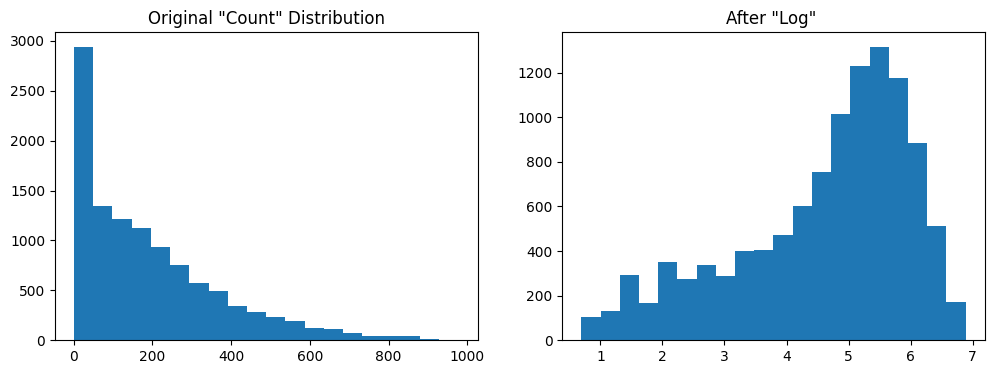

In [91]:
## 로그변환, 피처 인코딩

# 1) y값이 정규 분포로 되어있는지 확인
# 2) 원-핫 인코딩으로 피처 인코딩

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y = df['count']
X = df.drop(columns = ['count', 'datetime'], axis = 1)

# 데이터 세트 분할
X_train, X_test, y_train, y_tes = train_test_split(X, y, test_size = 0.2, random_state = 1243)

# LInear 모델 선정
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

sample_df = pd.concat([pd.DataFrame(y_test.values, columns = ['Actual']) , pd.DataFrame(lr_pred, columns =['pred'])], axis =1)
sample_df['diff'] = sample_df['Actual'] - sample_df['pred']
print(sample_df.sort_values('diff', ascending = False).head(5))

print("""
예측값과 실제값의 차이가 커서, 예측 오류가 상당히 큰 경우에는 Target 값의 분포가 왜곡된 형태인지 확인해야한다.
""")

fig, axes = plt.subplots(1,2, figsize = (12, 4))
axes[0].hist(y, bins = 20)
axes[0].set_title('Original "Count" Distribution')

axes[1].hist(np.log1p(y), bins =20)
axes[1].set_title('After "Log" ')
print("""
Count 값이 왼쪽으로 치우쳐진 분포를 띄우고 있으며, 이렇게 왜곡된 값을 정규 분포로 바꾸기 위해서는
log를 적용하여 변환하는 것이다. 정규 분포는 아니지만, 변환전 왜곡 정도가 많이 향상되었다.
""")

0.6857906846138963
        Actual      pred      diff
1066  5.181784  3.614950  1.566834
2035  5.257495  3.981589  1.275906
1039  5.424950  4.167702  1.257248
95    5.337538  4.087247  1.250291
873   5.379897  4.140346  1.239551

year, hour, month등은 카테고리 형태이기 때문에, 모두 숫자로 변환해야한다. 
숫자형 카테고리 값을 선형 회귁에 사용할 경우 회귀 계수를 연산할 때 숫자형 값에 크게 영향을 받은 경우가 발생한다.
이러한 경우 원-핫 인코딩을 적용 



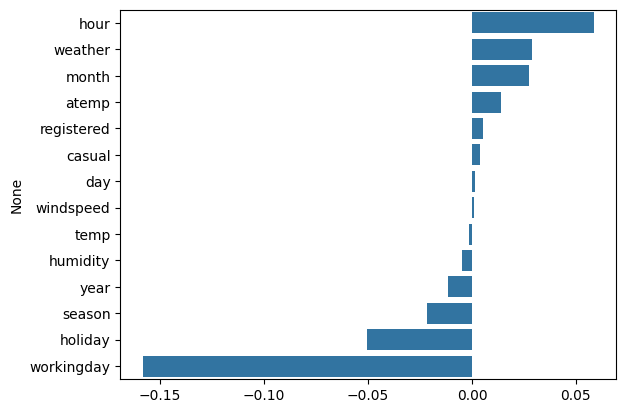

In [76]:
# log를 씌운 y값으로 다시 실행
log_y = np.log1p(df['count'])
y = df['count']
log_y = np.log1p(y)
X = df.drop(columns = ['count', 'datetime'], axis = 1)

# 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, log_y, test_size = 0.2, random_state = 1243)

# LInear 모델 선정
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, lr_pred)))

sample_df = pd.concat([pd.DataFrame(y_test.values, columns = ['Actual']) , pd.DataFrame(lr_pred, columns =['pred'])], axis =1)
sample_df['diff'] = sample_df['Actual'] - sample_df['pred']
print(sample_df.sort_values('diff', ascending = False).head(5))

# 피처의 회귀계수의 값을 시각화
coef = pd.Series(lr.coef_, index = X.columns).sort_values(ascending= False)
sns.barplot(x = coef.values, y = coef.index)

print("""
year, hour, month등은 카테고리 형태이기 때문에, 모두 숫자로 변환해야한다.
숫자형 카테고리 값을 선형 회귁에 사용할 경우 회귀 계수를 연산할 때 숫자형 값에 크게 영향을 받은 경우가 발생한다.
이러한 경우 원-핫 인코딩을 적용
""")

In [95]:
# 카테고리형 >> 숫자형으로 원-핫 인코딩
dummies_X = pd.get_dummies(X, columns = ['year','month', 'day', 'hour', 'season','workingday', 'weather', 'holiday'] , dtype = 'int', drop_first= True)
y = df['count']
log_y = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(dummies_X, log_y, test_size = 0.2, random_state = 1243)

models = {
    "Linear Regression" : LinearRegression(),
    "RIdge" : Ridge() ,
    "Lasso" : Lasso()
}

res = []
for name, model in models.items() :
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, pred))
  r2 = r2_score(y_test, pred)
  res.append([name, rmse, r2])

pd.DataFrame(res, columns = ['Modle', 'RMSE', 'r2_score'])



,Modle,RMSE,r2_score
0,Linear Regression,0.461138,0.887876
1,RIdge,0.461293,0.887801
2,Lasso,0.781735,0.677777
